# 이론
자연어 처리는 **텍스트 데이터를 기반으로 원하는 task를 수행하고자 하는 인공지능 분야**이다.   
- 감성 분석(sentiment analysis)은 문장의 긍정, 부정 정도를 분류하는 자연어 처리 분류 task이다.
  - 컴퓨터 비전 입문을 이미지 분류로 하는 것 처럼 NLP에서 처음 접하게 되는 task이다.
이전에 다루었던 이미지의 경우 신경망에 입력하기 적절한 numerical 값을 가진다.
- 신경망은 입력값의 스케일에 직접적으로 영향을 받기 때문에 **값의 대소에 따라 각각 의미를 갖는 입력**이 필요하다.
신경망이 텍스트를 입력받는 방식은 char-level / word-level로 구분 가능하다.
- char-level: 각 문자를 그와 관련한 피처들로 바꾸어 입력한다.
- word-level: 각 단어를 "

한자와 같은 표의문자는 char-level 방식이 더 용이하며, 영어, 한글같은 표음문자는 word-level 방식이 더 용이하다.   
이제 word-level로 딥러닝을 한다고 하자. 다음로는 각 단어를 어떤 피쳐들로 바꿀 것인가?   

### 원-핫 인코딩
원-핫 인코딩은 다중 클래스 분류 문제에서 라벨을 만들던 방식과 유사하다.   
NLP 분야에서 학습에 사용하는 데이터셋을 **말뭉치, corpus**라 한다.   
- corpus def: 자연어 연구를 위해 특정 목적을 가지고 추출한 언어 표본 집합

원-핫 인코딩을 하기 위해...   
1. corpus 내 모든 단어에 대해 중복을 제거한 리스트 생성
2. 모든 단어 수에 해당하는 크기를 갖도록 feature vector 크기를 설정
3. 각 단어의 feature vector는 리스트 내 해당 단어의 index와 같은 위치의 feature는 1, 나머지 feature들은 전부 0으로 설정.


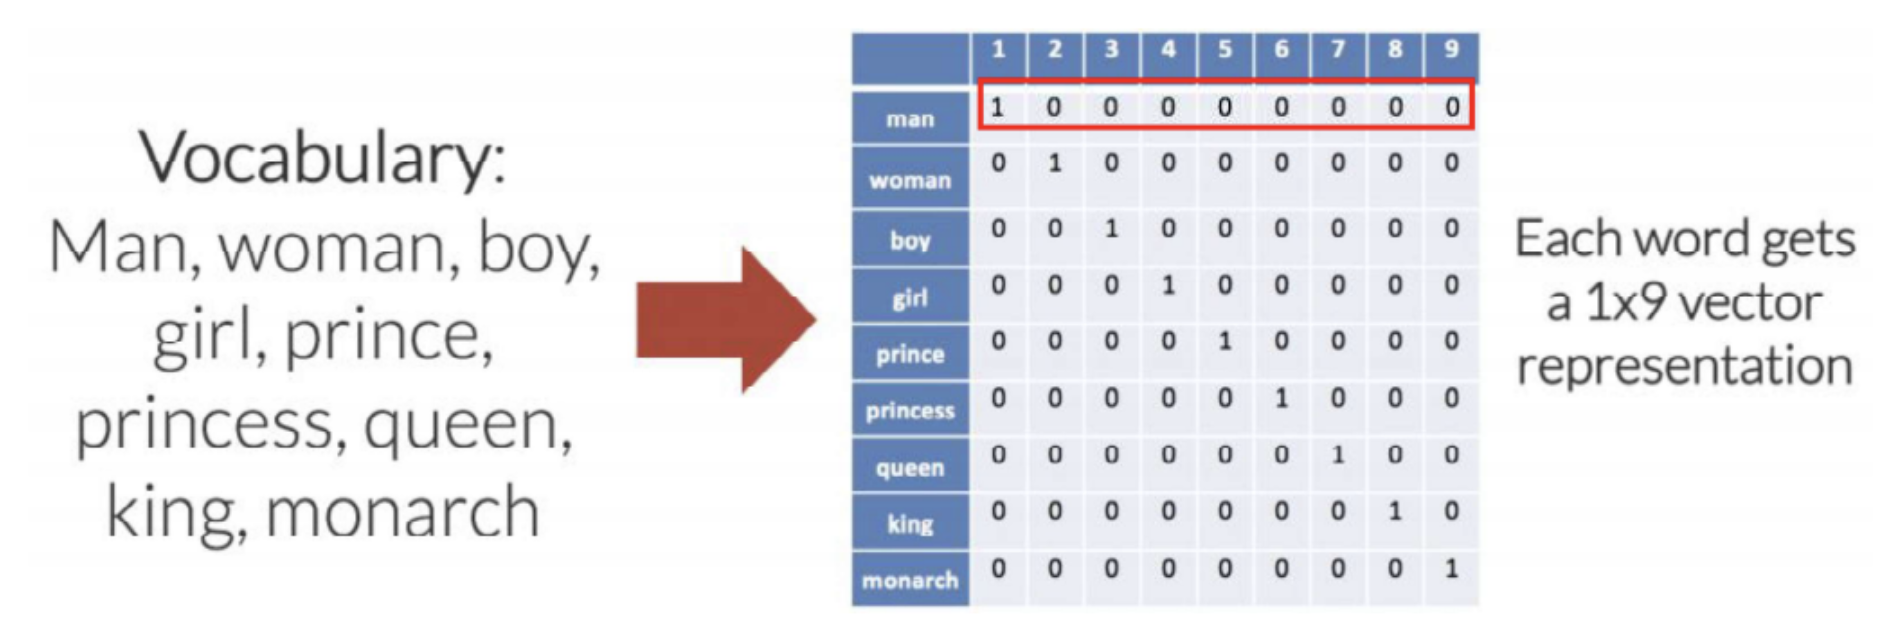
- 이와 같이 벡터의 값이 대부분 0으로 표현되는 것을 **희소 표현**(sparse representation)이라고 한다.
- 이와 반대로 대부분 0 이외의 값을 갖는 것을 **밀집 표현**(dense representation)이라고 한다.

이렇게 원-핫 인코딩을 통해 단어를 수치화할 경우 아래와 같은 두 가지 큰 단점이 존재한다.
- 단어 수가 늘어남에 따라 벡터 크기가 같이 늘어난다.
  - 크기가 커질수록 대부분 값이 0을 가지므로 메모리 낭비가 더더욱 심해진다.
- 서로 다른 단어 사이의 유사도를 알 수가 없다.
  - 피쳐 벡터 사이의 유사도를 구할 때는 cosine similarity를 널리 활용한다.
    - 두 벡터 사이 각에 대한 코사인 값에 해당한다. -1 ~ 1의 값 범위를 가진다.
    - 세 벡터가 우연찮게 orthogonal할 때는 어떻게 유사도를 구할 것인가?

### 워드 임베딩
**각 단어를 밀집 표현 형태로 나타내는 단어 표현 방식**을 의미한다.
- 단어에 대한 피쳐 벡터들이라고 할 수 있다.

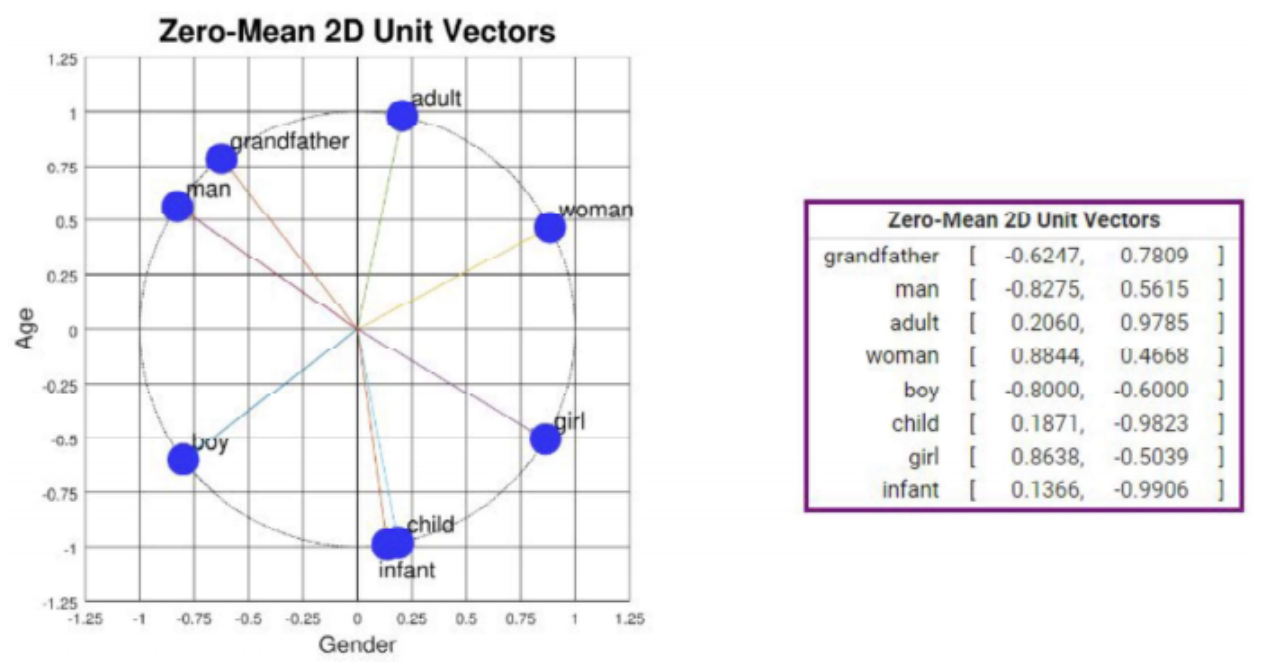   
이것을 어떻게 하는가?   
- 적절한 밀집 표현을 찾는 것은 규칙 기반으로는 어렵고 주로 **표현 학습**을 통해 워드 임베딩을 구한다.   
- 실제로는 각 단어에 대한 워드 임베딩을 **어떤 방식으로 학습시켜서 최종 표현을 얻을지**가 요점이다.   

#### 분포 가설(distributional hypothesis) - 현대 표현 학습의 근간
유사한 문맥(context)에서 등장하는 단어는 유사한 뜻을 가지고 있을 것이라는 가설이다.   
NLP에서 context란 **특정 단어 주변의 단어 집합**을 의미한다.   
- government debt problems turning into **banking** crises as ...
- saying that Europe needs unified **banking** regulation to ...
- India has just given its **banking** system ...

banking 주변 단어 조합들은 결국 banking 단어와 관련한 의미들을 나타내고 있을 것이다.   
### Word2Vec
단어를 벡터로 변환해주는 알고리즘의 일종이다.   
이로 학습된 임베딩을 활용하면 cosine similiarity 기준 특정 단어와 가장 가까운 단어들을 추출할 수 있다.   
**CBOW(Continuous Bag Of Words), skip-gram** 총 두 가지의 학습 방식이 있다.   
#### CBOW
**주변 단어들을 통해 중심 단어를 예측**하도록 하는 임베딩 방식이다.   
한 번에 살펴보는 단어 수를 window라고 한다.   
임베딩 학습 과정에서는 각 단어를 원-핫 인코딩으로 나타낸다.   
1. context에 해당하는 단어들의 **원-핫 인코딩으로부터 가중치를 곱한 값을 취합**한다.
2. **취합된 값이 목표 중심 단어의 원-핫 인코딩을 예측**할 수 있도록 가중치를 학습한다.

CBOW에서 가중치의 역할은 **마치 특정 단어의 feature vector를 반환**해주는 것과 같아 **lookup table**이라고도 한다.   
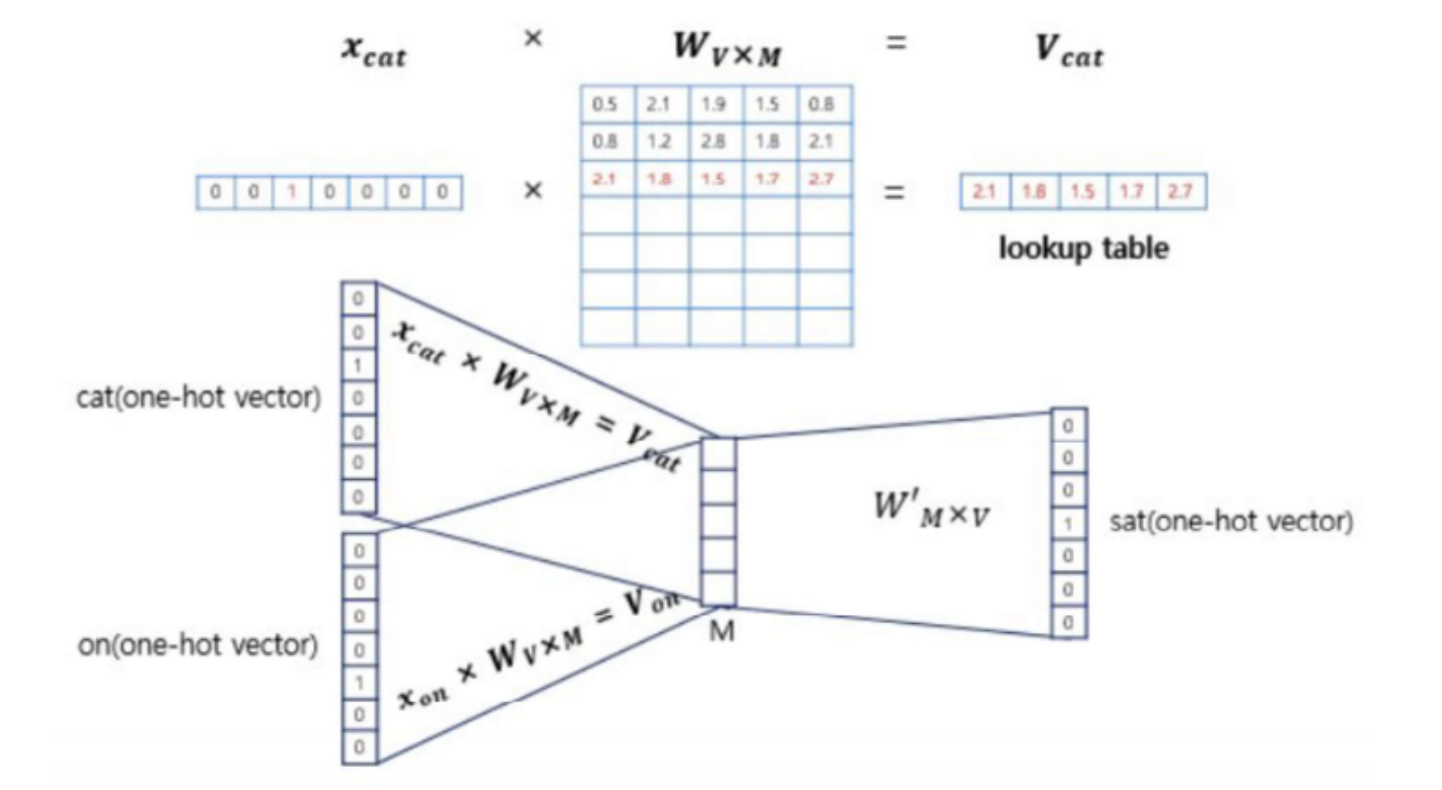
이렇게 각 단어의 원-핫 벡터와 가중치 값을 곱한 결과는 **평균 방식으로 취합**되어 projection layer의 값을 이룬다.   
이런 값 취합 과정에서 별도 활성 함수는 적용되지 않았다.
- Linear activation이라고 볼 수도 있다.

Projection layer에서 취합된 값에 다시 가중치 곱을 수행, 이렇게 구한 크기 V의 벡터에 **소프트맥스를 적용해 목표 원-핫 벡터와의 손실값을 계산**한다.   
- 원-핫 벡터와 소프트맥스가 적용된 벡터 사이 손실값은 CE loss가 널리 활용된다.

즉, projection layer에서 output layer로 가는 과정과 학습 과정은 **소프트맥스 회귀와 매우 유사**하다.   
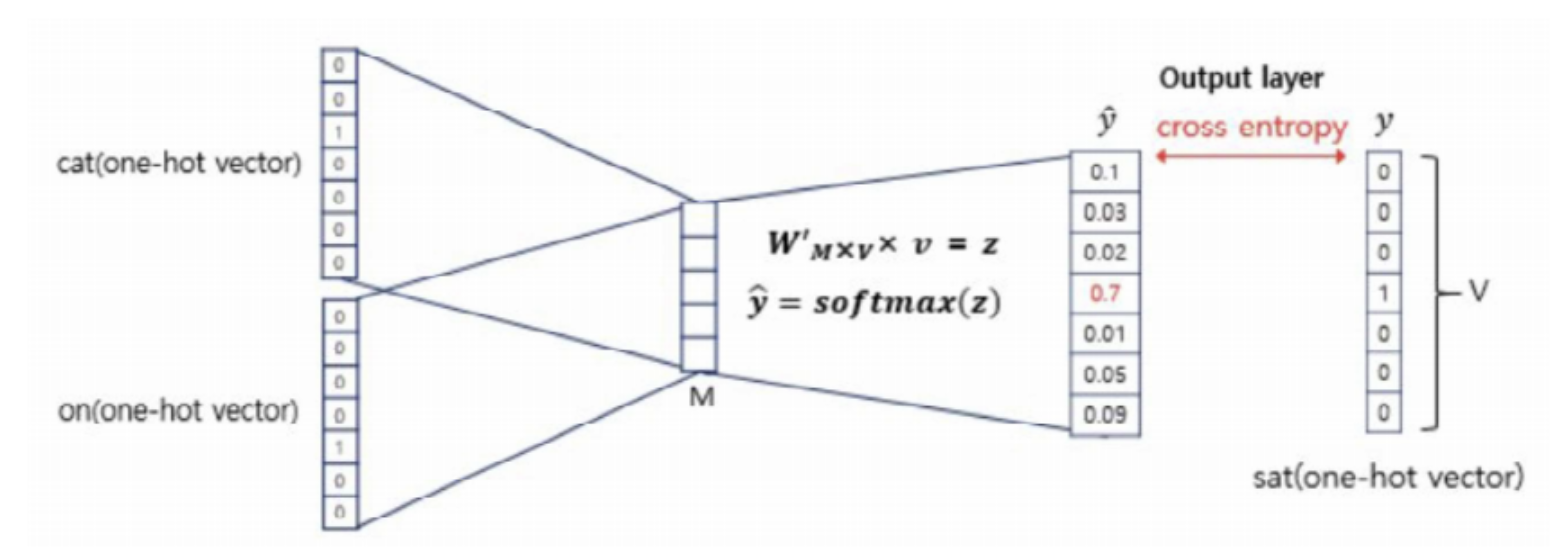
이 모든 과정을 정리해보자.   
1. 윈도우를 이용해 중심 단어의 문맥을 구분
2. 문맥 단어들에 대해 원-핫 인코딩으로 표현된 벡터와 가중치 W의 곱을 구해 평균하여 projection layer의 값을 계산
3. Projection layer의 값과 W'의 곱을 구한 후 소프트맥스를 적용해 예측값 도출
4. 중심 단어의 원-핫 벡터와 예측값 사이의 손실값 계산 후 **W, W' 경사하강법으로 학습**
5. 이것이 1 이터레이션이며 (W, W') 수렴시까지 반복한다.

학습이 완료되면 CBOW 모델은 W, W'값들을 남기며 **W의 각 row를 해당 인덱스에 해당하는 단어의 최종 워드 임베딩으로 활용**한다.   
그러나 W'도 각 col이 M의 크기를 갖기 때문에 임베딩 활용 여지가 있으며 W, W'정보를 평균해 임베딩으로 활용가능하다.   
#### Skip-gram
CBOW와 반대로 중심 단어로부터 나머지 문맥 단어들을 예측할 수 있게 학습 진행.   
학습 원리는 CBOW와 유사하다.   
### 워드 임베딩 학습 과정
코퍼스가 구축되어 있을 때 아래 두 과정을 통해 데이터를 정제한 후 모델 학습을 진행한다.
- 토큰화(tokenization)
  - 문장을 단어, 형태소 등의 **목표 최소 단위로 자르고 리스트 형태로 만드는** 과정
  - 영어는 띄어쓰기 및 문장부호 단위로 토큰화를 해도 문제가 없지만 한국어는 "나는", "나를"과 같이 유사한 단어에 서로 다른 조사가 붙는데 컴퓨터는 모두 다른 단어로 인식한다.
  - 이에 KNLP는 형태소 단위의 토큰화를 진행한다.
- 불용어 제거(removing stop-words)
  - 불용어란 특정 언어에서 너무 자주 사용되고 때에 따라 의미가 달라져 **제거하는 것이 성능에 도움이 되는 단어**들을 의미한다.
  - 따라서 절대적인 불용어 리스트는 없으며, 상황에 따라 정의하여 **토큰화 이후 불용어 토큰들은 제거하고 이후 작업을 수행**한다.
# 구현

In [5]:
import gensim.downloader as api
corpus = api.load('text8')

gensim은 파이썬 기반 NLP, 특히 임베딩 관련 학습 및  활용을 할 때 많이 사용하는 라이브러리다.   
- 각종 자연어 전처리 기능 및 임베딩 모델들이 구현되어 있다.
- text8은 위키피디아 텍스트 데이터를 축소한 버전의 corpus이다.

In [6]:
#총 문장 수 출력
count = 0
for i, e in enumerate(corpus):
  if i < 10:
    print(e)
  count += 1
print("Total sentences: ", count)

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 'so

In [7]:
import gensim.models

model = gensim.models.Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=5, sg=0)

Word2Vec 모델 학습 학습. 원래 이터레이터에서 문장 단위로 결과를 내어주도록 입력하는 것이 정석이나, 현재 코퍼스에서는 문서 단위로 넘어간다.   
- 파라미터 설명
  - sentences: 학습 대상 코퍼스
  - size: 임베딩 벡터 크기
  - window: 문맥 윈도우 크기
  - min_count: 횟수 이상 등장하는 단어만 임베딩 학습
  - sg: 0이면 CBOW, 1이면 skip-gram으로 학습

In [8]:
model_result = model.wv.most_similar("military")
print(model_result)
pairs = [
  ('car', 'minivan'),
  ('car', 'bicycle'),
  ('car', 'airplane'),
  ('car', 'cereal'),
  ('car', 'alchemy')
]
for w1, w2 in pairs:
  print('%r %r  %.2f' % (w1, w2, model.wv.similarity(w1, w2)))
print(model.wv['car'])

[('civilian', 0.7463423609733582), ('conscription', 0.7094897031784058), ('armed', 0.6998873353004456), ('wartime', 0.6838704347610474), ('defence', 0.6561251878738403), ('troop', 0.6529502272605896), ('naval', 0.642611026763916), ('peacekeeping', 0.6379616856575012), ('guerrilla', 0.6367968320846558), ('paramilitary', 0.6350843906402588)]
'car' 'minivan'  0.33
'car' 'bicycle'  0.61
'car' 'airplane'  0.58
'car' 'cereal'  0.20
'car' 'alchemy'  -0.23
[-1.0946656   0.2564663   0.9481936   0.5822474   0.5135145  -0.586601
 -1.3552115  -1.6567547   0.6625666   0.5370263   1.0487418   0.7516879
 -0.55538964  1.1814959  -2.3022807  -0.6008139   1.1662027  -0.6789312
 -1.258358    0.94666326  0.7930436   2.4785688   1.1936626   0.5540107
 -1.6585991  -1.274043   -0.1839553   2.264393    0.34275687  1.0499483
  2.0611546   2.1255226   0.7071259  -0.11361904 -2.1660829   0.5383942
 -0.8275838  -2.1865046  -1.9941446   0.10718729  0.0359325  -1.4520527
 -0.1336587   1.5930785   0.7243021  -0.9864

### PyTorch nn.Embedding
딥러닝 기반 자연어 처리 연구에서는 워드 임베딩을 따로 학습해서 사용하기 보다 **학습 가능한 임베딩 lookup table**을 주로 이용한다.   
nn.embedding은 이러한 임베딩 lookup table을 구현한 클래스이며, 아래 구조로 학습이 진행된다.   
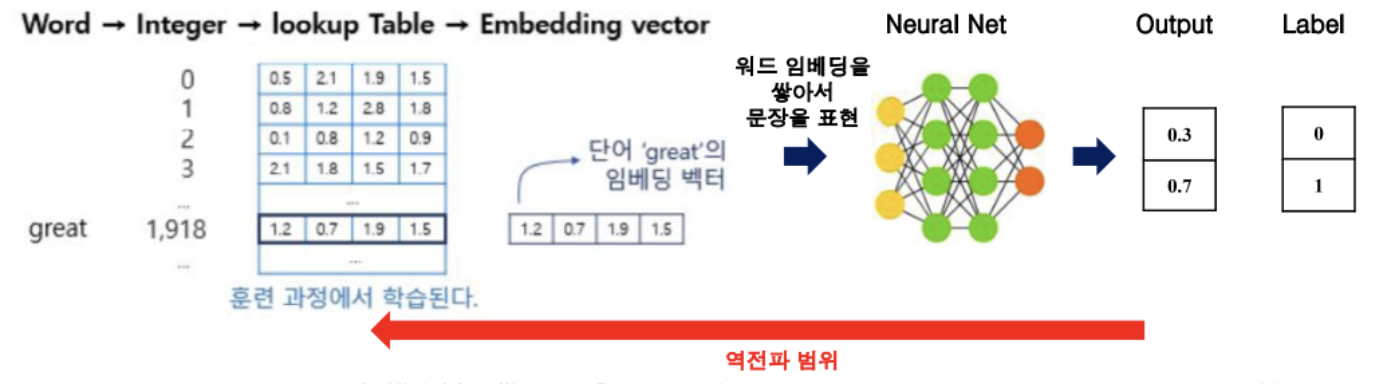
이미지와 달리 임베딩 lookup table은 입력값에까지 역전파가 진행된다.   


단어 집합을 만들 때 아래와 같은 특수 단어들을 추가해 활요하는 경우가 많다.
- unk: unknown으로 **단어 집합에 없는 단어를 추론 시 보게 되면** 활용할 임베딩이다.
- pad: 미니배치는 텐서 형태이기 때문에 정해진 길이를 채워주어야 한다. 이에 일반적으로 **짧은 문장은 뒤에 남는 공간을 0으로 가득한 임베딩으로 채운다.**

In [9]:
train_data = 'you need to know how to code'

# 중복 제거 단어 집합 생성
word_set = set(train_data.split())

# 단어 집합의 각 단어에 고유한 정수 맵핑
vocab = {word: i+2 for i, word in enumerate(word_set)}
vocab['<unk>'] = 0
vocab['<pad>'] = 1
print(vocab)

{'need': 2, 'to': 3, 'you': 4, 'know': 5, 'how': 6, 'code': 7, '<unk>': 0, '<pad>': 1}


nn.Embedding을 사용하지 않고 유사 형태의 텐서를 직접 만들어서 활용해보자.   
8개 단어를 각각 **크기 3 임베딩**으로 표현할 수 있게 lookup table을 생성한다.   

In [10]:
import torch
embedding_table = torch.FloatTensor([
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.2, 0.9, 0.3],
  [0.1, 0.5, 0.7],
  [0.2, 0.1, 0.8],
  [0.4, 0.1, 0.1],
  [0.1, 0.8, 0.9],
  [0.6, 0.1, 0.1]]) # 8 row

새로운 문장을 임베딩 lookup table을 이용해 임베딩 형태로 나타내는 예시이다.   
문장 토큰화 후, 각 단어를 단어 사전 인덱스 값으로 대체한 텐서를 생성한다.

In [15]:
sample = 'you need to run'.split()
idxes = []

# 각 단어를 정수로 변환
for w in sample:
  try:
    idxes.append(vocab[w])
    # 단어 집합에 없을 경우 <unk>로 대체됨
  except KeyError:
    idxes.append(vocab['<unk>'])
idxes = torch.LongTensor(idxes)
print(idxes)

tensor([4, 2, 3, 0])


단어 집합에 없는 단어일 경우 unk에 해당하는 임베딩을 사용한다.   
전체 과정은 아래와 같다.
1. 문장 토큰화
2. 각 단어 **인덱스 형태로 변경**
3. 각각 인덱스에 해당하는 **임베딩으로 대체**

In [16]:
lookup_result = embedding_table[idxes, :]
print(lookup_result)

tensor([[0.2000, 0.1000, 0.8000],
        [0.2000, 0.9000, 0.3000],
        [0.1000, 0.5000, 0.7000],
        [0.0000, 0.0000, 0.0000]])


같은 형태의 작업을 nn.Embedding을 통해 구현해보자.   
- num_embeddings: 전체 단어 수
- embedding_dim: 임베딩 크기
- padding_idx: 단어 사전에서 pad 토큰의 인덱스를 지정

nn.Embedding 객체는 **pad 이외에는 랜덤 값들로 임베딩을 설정**
- 임베딩 값들이 학습되도록 requires_grad=True임을 확인 가능

In [17]:
import torch.nn as nn
embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=3,
                               padding_idx=1)
print(embedding_layer.weight)

Parameter containing:
tensor([[-1.6507,  1.6733,  2.2387],
        [ 0.0000,  0.0000,  0.0000],
        [-0.2848,  0.3803, -1.0344],
        [-0.1483, -0.8700, -0.2633],
        [-0.2926,  1.4026, -0.0472],
        [ 0.2398, -0.1229, -0.3452],
        [-0.1398,  1.1021,  0.5839],
        [-1.8875,  0.0635, -0.4046]], requires_grad=True)


nn.Embedding 객체는 **단어들의 인덱스로 표현된 텐서**를 입력하면 각 인덱스가 **임베딩으로 대체된 결과를 반환**해 준다.

In [18]:
sample = 'you need to run'.split()
idxes = []

# 각 단어를 정수로 변환
for w in sample:
  try:
    idxes.append(vocab[w])
    # 단어 집합에 없을 경우 <unk>로 대체됨
  except KeyError:
    idxes.append(vocab['<unk>'])
idxes = torch.LongTensor(idxes)

# 각 정수를 인덱스로 임베딩 테이블에서 값을 가져옴
lookup_result = embedding_layer(idxes)
print(lookup_result)

tensor([[-0.2926,  1.4026, -0.0472],
        [-0.2848,  0.3803, -1.0344],
        [-0.1483, -0.8700, -0.2633],
        [-1.6507,  1.6733,  2.2387]], grad_fn=<EmbeddingBackward0>)
